In [50]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt 
import seaborn as sns

import wrangle as wr

np.random.seed(4)

from sklearn.cluster import KMeans

---

#### Moving on from the wrangle.jpynb I'll take a look at each distribution 

In [2]:
zillow = wr.acquire()
zillow = wr.get_single_unit_homes(zillow)
zillow = wr.handle_missing_values(zillow)

In [3]:
zillow.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,1970746,10887214,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,34185120.0,...,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Condominium


In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71687 entries, 0 to 77379
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71687 non-null  int64  
 1   parcelid                      71687 non-null  int64  
 2   bathroomcnt                   71687 non-null  float64
 3   bedroomcnt                    71687 non-null  float64
 4   calculatedbathnbr             71472 non-null  float64
 5   calculatedfinishedsquarefeet  71538 non-null  float64
 6   finishedsquarefeet12          71359 non-null  float64
 7   fips                          71687 non-null  float64
 8   fullbathcnt                   71472 non-null  float64
 9   latitude                      71687 non-null  float64
 10  longitude                     71687 non-null  float64
 11  lotsizesquarefeet             63578 non-null  float64
 12  propertycountylandusecode     71687 non-null  object 
 13  p

<Figure size 720x576 with 0 Axes>

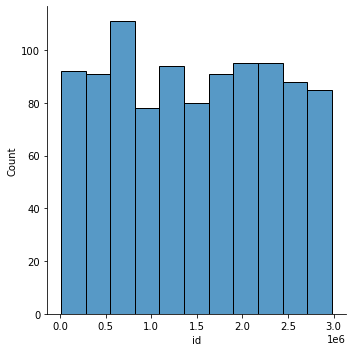

<Figure size 720x576 with 0 Axes>

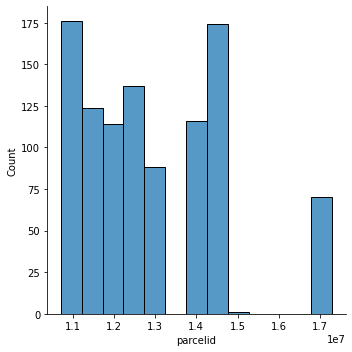

<Figure size 720x576 with 0 Axes>

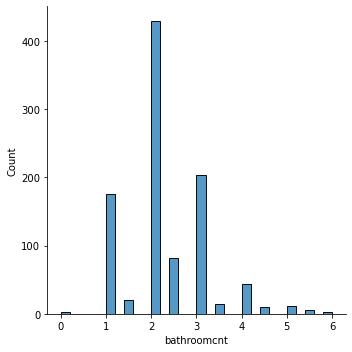

<Figure size 720x576 with 0 Axes>

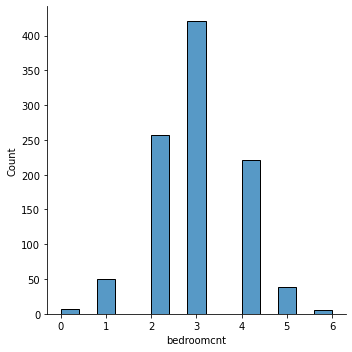

<Figure size 720x576 with 0 Axes>

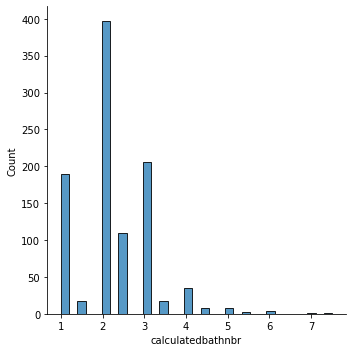

<Figure size 720x576 with 0 Axes>

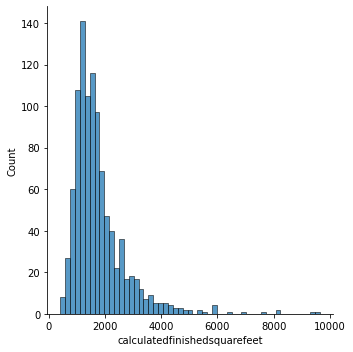

<Figure size 720x576 with 0 Axes>

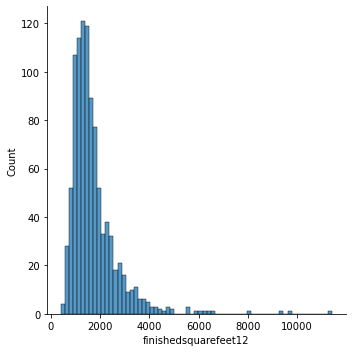

<Figure size 720x576 with 0 Axes>

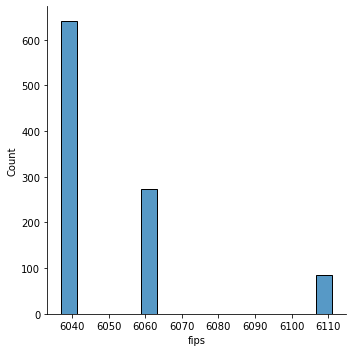

<Figure size 720x576 with 0 Axes>

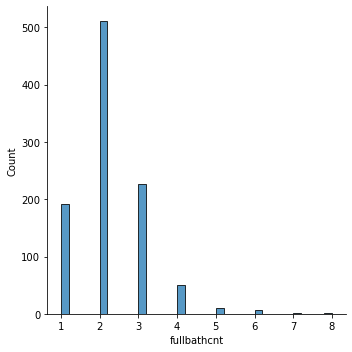

<Figure size 720x576 with 0 Axes>

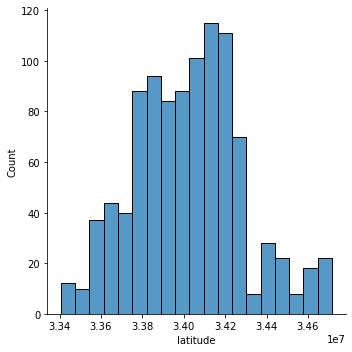

<Figure size 720x576 with 0 Axes>

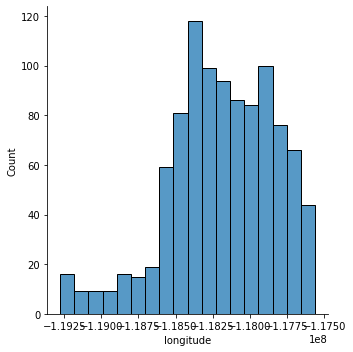

<Figure size 720x576 with 0 Axes>

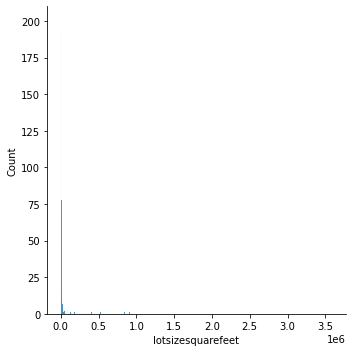

<Figure size 720x576 with 0 Axes>

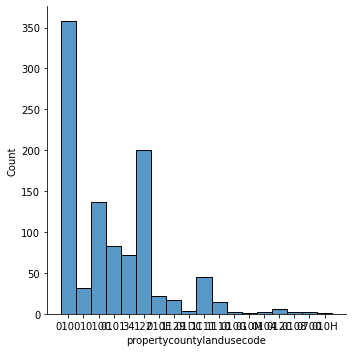

<Figure size 720x576 with 0 Axes>

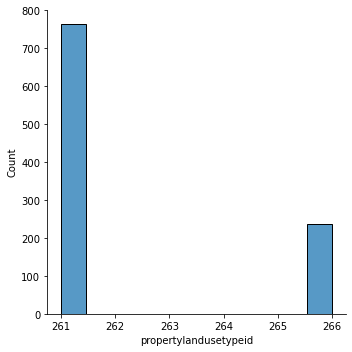

<Figure size 720x576 with 0 Axes>

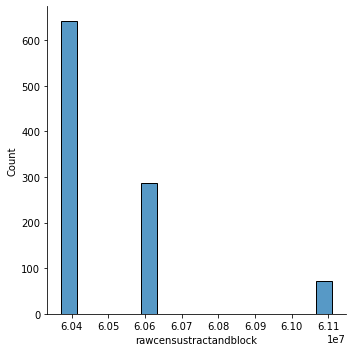

<Figure size 720x576 with 0 Axes>

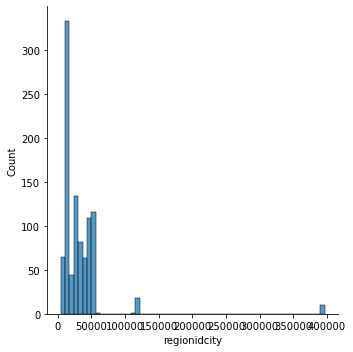

<Figure size 720x576 with 0 Axes>

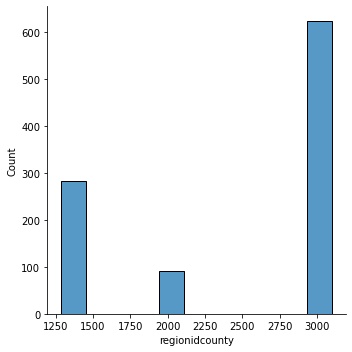

<Figure size 720x576 with 0 Axes>

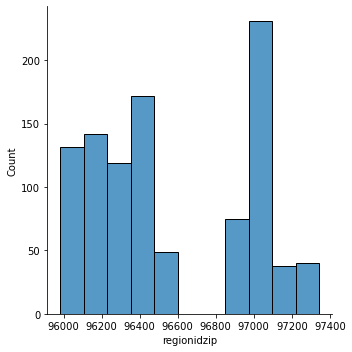

<Figure size 720x576 with 0 Axes>

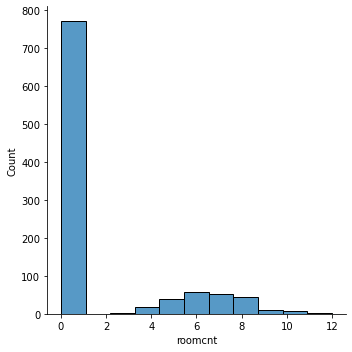

<Figure size 720x576 with 0 Axes>

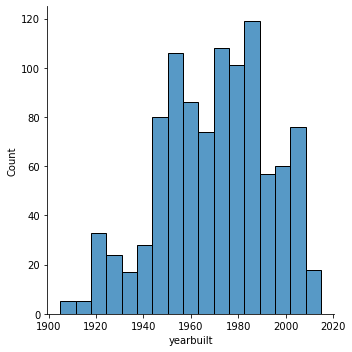

<Figure size 720x576 with 0 Axes>

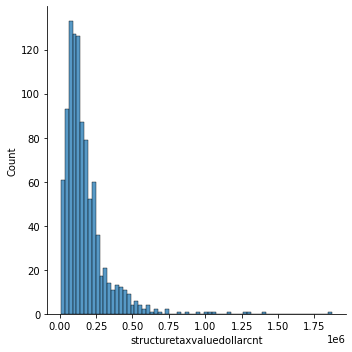

<Figure size 720x576 with 0 Axes>

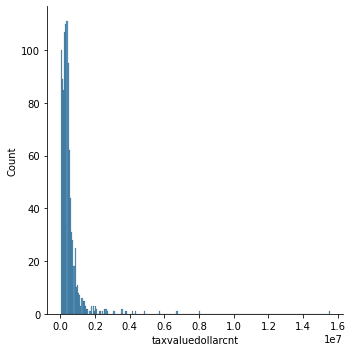

<Figure size 720x576 with 0 Axes>

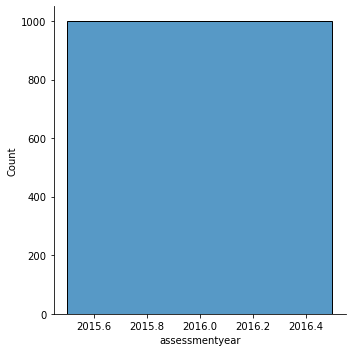

<Figure size 720x576 with 0 Axes>

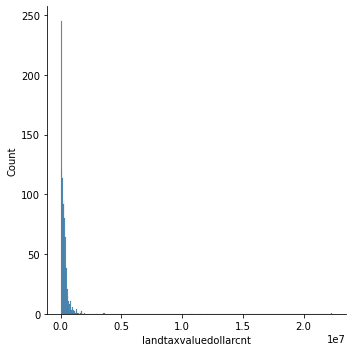

<Figure size 720x576 with 0 Axes>

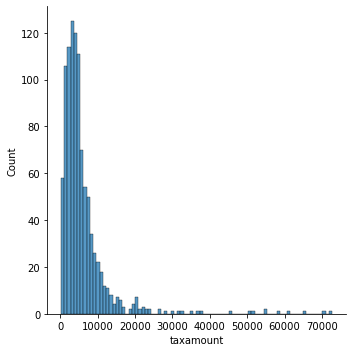

<Figure size 720x576 with 0 Axes>

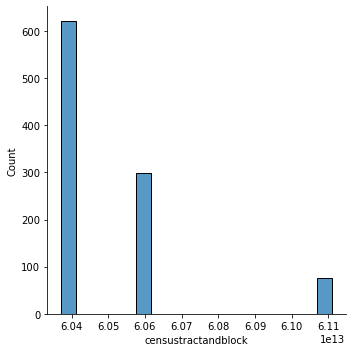

<Figure size 720x576 with 0 Axes>

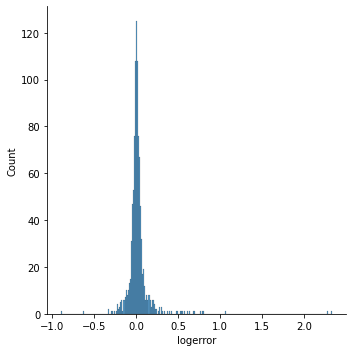

<Figure size 720x576 with 0 Axes>

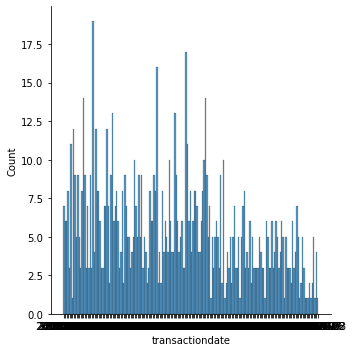

<Figure size 720x576 with 0 Axes>

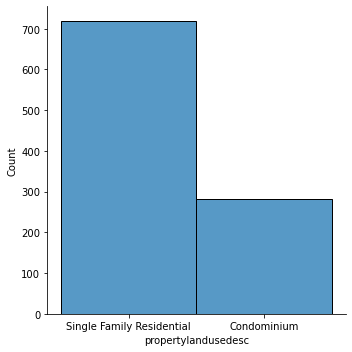

In [5]:
columns = zillow.columns
for col in columns:
    plt.figure(figsize=(10,8))
    sns.displot(data=zillow.sample(1000), x=col)

### Now that I've seen the distribution of the dataset, I will begin an indepth exploration 

# Acquire Data:

In [6]:
train, validate, test = wr.wrangle_zillow()

In [7]:
train.shape, validate.shape, test.shape

((40144, 29), (17205, 29), (14338, 29))

In [8]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
35021,231273,12456239,1.0,1.0,1.0,480.0,480.0,6037.0,1.0,33852376.0,...,1942.0,19116.0,45881.0,2016.0,26765.0,702.78,6.037571e+13,0.110467,2017-05-11,Single Family Residential
33140,1933311,12853199,4.0,4.0,4.0,4325.0,4325.0,6037.0,4.0,34051825.0,...,1987.0,769091.0,1366904.0,2016.0,597813.0,16978.33,6.037406e+13,0.023421,2017-05-05,Single Family Residential
5579,188180,12864000,4.0,5.0,4.0,2828.0,2828.0,6037.0,4.0,34118415.0,...,1962.0,99806.0,148451.0,2016.0,48645.0,2239.74,6.037402e+13,0.000151,2017-01-26,Single Family Residential
71705,2846815,14733743,2.5,2.0,2.5,1150.0,1150.0,6059.0,2.0,33584322.0,...,1998.0,161444.0,311854.0,2016.0,150410.0,4360.20,6.059032e+13,0.054847,2017-08-30,Condominium
57277,567191,17075614,3.0,3.0,3.0,2046.0,2046.0,6111.0,3.0,34284295.0,...,1990.0,183026.0,796305.0,2016.0,613279.0,8327.44,6.111002e+13,0.092856,2017-07-14,Single Family Residential


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40144 entries, 35021 to 30112
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            40144 non-null  int64  
 1   parcelid                      40144 non-null  int64  
 2   bathroomcnt                   40144 non-null  float64
 3   bedroomcnt                    40144 non-null  float64
 4   calculatedbathnbr             40144 non-null  float64
 5   calculatedfinishedsquarefeet  40144 non-null  float64
 6   finishedsquarefeet12          40144 non-null  float64
 7   fips                          40144 non-null  float64
 8   fullbathcnt                   40144 non-null  float64
 9   latitude                      40144 non-null  float64
 10  longitude                     40144 non-null  float64
 11  lotsizesquarefeet             35719 non-null  float64
 12  propertycountylandusecode     40144 non-null  object 
 1

In [10]:
# verifying single unit property land types
train.propertylandusedesc.value_counts()

Single Family Residential    29383
Condominium                  10714
Mobile Home                     43
Townhouse                        4
Name: propertylandusedesc, dtype: int64

There seems to be a few outliers, so I'll check the dataframe with outliers removed with a standard 'omit outliers' function created from the previous zillow observation.

### Questions :
- Is log error significantly different per number of bathrooms?
- Is log error significantly different per number of bedrooms?
- Is log error significantly different per average sqaure feet in LA vs Orange vs Ventura? 
- Is log error significantly different per age of a home? 
- Is log error significantly different depending on the type of property. 

To answer these questions, I will make a dataframe from train that only contains the neccessary columns.

In [11]:
# select columns for that may be able to answer these specific
# set of questions
cols = ['parcelid','logerror', 'bathroomcnt',
                     'bedroomcnt', 'calculatedfinishedsquarefeet',
                     'fips', 'yearbuilt', 'propertylandusedesc']

train = train[cols]
validate = validate[cols]
test = test[cols]   

In [12]:
train = train.rename(columns={'bathroomcnt':'bathrooms', 
                                          'bedroomcnt':'bedrooms',
                                          'calculatedfinishedsquarefeet':'square_feet',
                                          'fips':'county', 'yearbuilt':'year_built', 
                                          'propertylandusedesc':'property_type'})
    
validate = validate.rename(columns={'bathroomcnt':'bathrooms', 
                                          'bedroomcnt':'bedrooms',
                                          'calculatedfinishedsquarefeet':'square_feet',
                                          'fips':'county', 'yearbuilt':'year_built', 
                                          'propertylandusedesc':'property_type'})
    
test = test.rename(columns={'bathroomcnt':'bathrooms', 
                                          'bedroomcnt':'bedrooms',
                                          'calculatedfinishedsquarefeet':'square_feet',
                                          'fips':'county', 'yearbuilt':'year_built', 
                                          'propertylandusedesc':'property_type'})

# set counties
county = {6037:'Los Angeles', 6059:'Orange', 6111:'Ventura'}

train.county = train.county.map(county)

validate.county = validate.county.map(county)

test.county = test.county.map(county)




# changing data types
train.bedrooms = train.bedrooms.astype(int)
train.square_feet = train.square_feet.astype(int)
train.year_built = train.year_built.astype(int)

validate.bedrooms = validate.bedrooms.astype(int)
validate.square_feet = validate.square_feet.astype(int)
validate.year_built = validate.year_built.astype(int)

test.bedrooms = test.bedrooms.astype(int)
test.square_feet = test.square_feet.astype(int)
test.year_built = test.year_built.astype(int)


# omit outliers
cols = ['bathrooms', 'bedrooms', 'square_feet']

train = wr.omit_outliers(train, 1.5, cols)
validate = wr.omit_outliers(validate, 1.5, cols)
test = wr.omit_outliers(test, 1.5, cols)

In [13]:
# post-tidy
train.head()

,parcelid,logerror,bathrooms,bedrooms,square_feet,county,year_built,property_type
35021,12456239,0.110467,1.0,1,480,Los Angeles,1942,Single Family Residential
5579,12864000,0.000151,4.0,5,2828,Los Angeles,1962,Single Family Residential
71705,14733743,0.054847,2.5,2,1150,Orange,1998,Condominium
57277,17075614,0.092856,3.0,3,2046,Ventura,1990,Single Family Residential
45925,11177880,-0.041157,2.0,2,1028,Los Angeles,1985,Single Family Residential


---

### Distribution of dataframe with:
- nulls
- fewer outliers
- cleaner data

<Figure size 720x576 with 0 Axes>

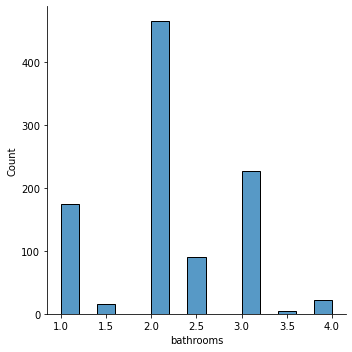

<Figure size 720x576 with 0 Axes>

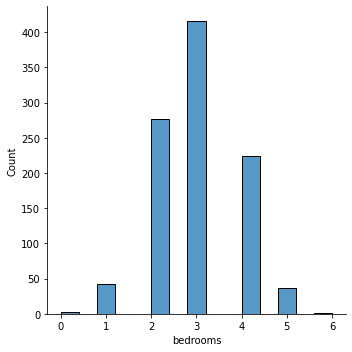

<Figure size 720x576 with 0 Axes>

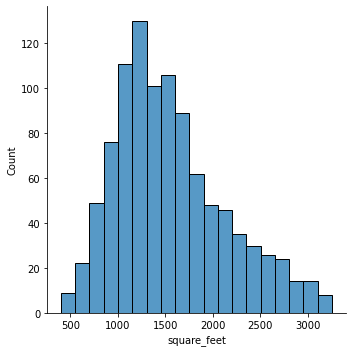

<Figure size 720x576 with 0 Axes>

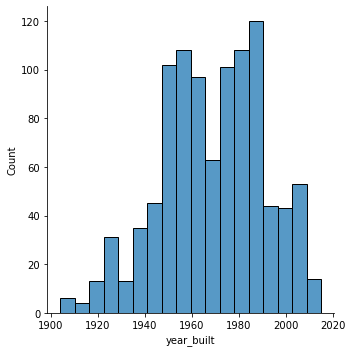

<Figure size 720x576 with 0 Axes>

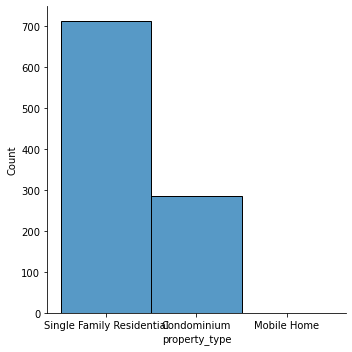

<Figure size 720x576 with 0 Axes>

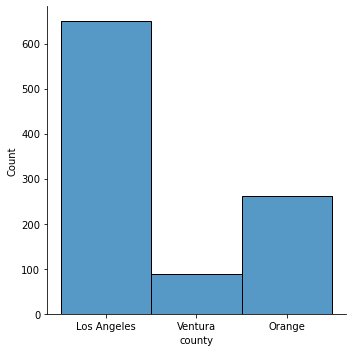

In [14]:
columns = ['bathrooms','bedrooms', 'square_feet', 'year_built',
           'property_type', 'county' ]

for col in columns:
    plt.figure(figsize=(10,8))
    sns.displot(data=train.sample(1000), x=col)

---

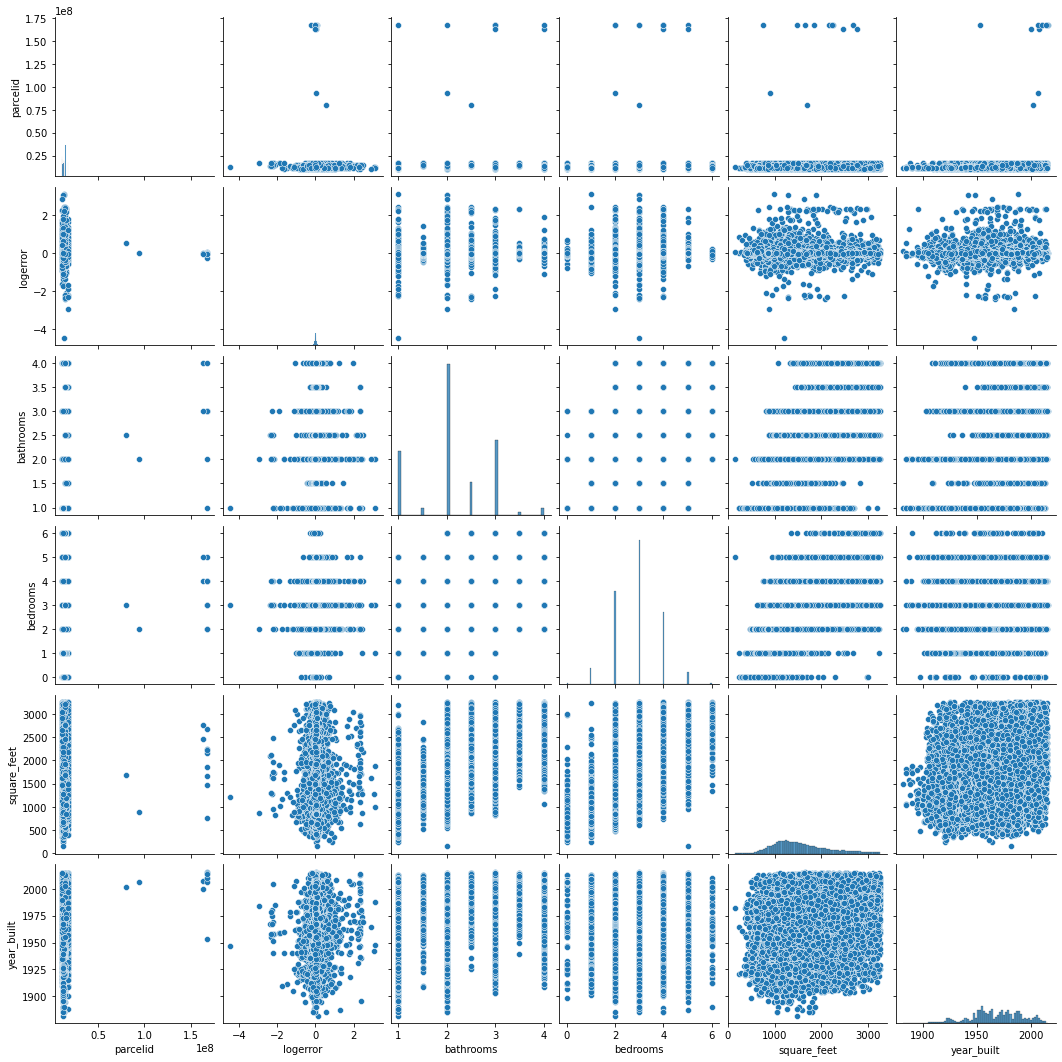

In [15]:
sns.pairplot(data=train)

Text(0, 0.5, 'Features')

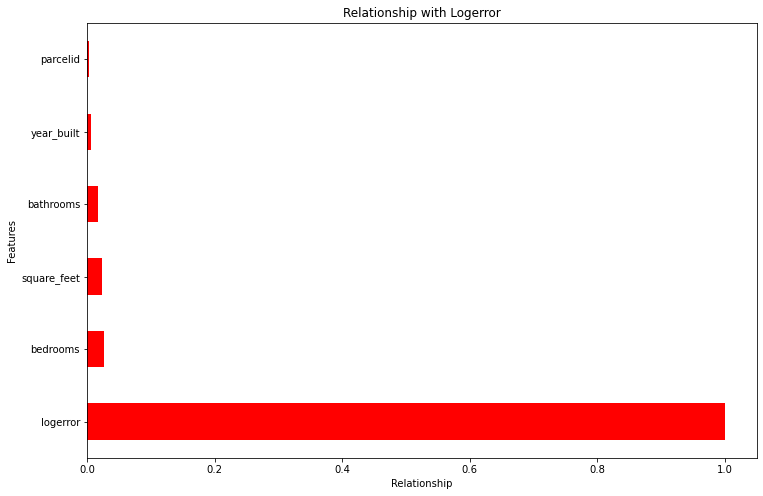

In [16]:
plt.figure(figsize = (12,8))
train.corr()['logerror'].sort_values(ascending=False).plot(kind='barh', color='red')
plt.title('Relationship with Logerror')
plt.xlabel('Relationship')
plt.ylabel('Features')

In [17]:
train.corr()

,parcelid,logerror,bathrooms,bedrooms,square_feet,year_built
parcelid,1.000000,0.003467,0.033093,0.055852,0.051178,0.150658
logerror,0.003467,1.000000,0.016717,0.026581,0.024118,0.005457
bathrooms,0.033093,0.016717,1.000000,0.507551,0.710294,0.452170
bedrooms,0.055852,0.026581,0.507551,1.000000,0.663142,0.039196
square_feet,0.051178,0.024118,0.710294,0.663142,1.000000,0.226297
year_built,0.150658,0.005457,0.452170,0.039196,0.226297,1.000000


#### The Questions to be asked when using this altered dataset: 
- Is log error significantly different per number of bathrooms?
- Is log error significantly different per number of bedrooms?
- Is log error significantly different per average sqaure feet in LA vs Orange vs Ventura? 
- Is log error significantly different per age of a home? 
- Is log error significantly different depending on the type of property. 

calculate age

In [18]:
train['property_age'] = (2017 - train.year_built)
validate['property_age'] = (2017 - validate.year_built)
test['property_age'] = (2017 - test.year_built)

### Question 1: Is number of bedrooms linearly correlated with logerror? (Linear corr)

In [19]:
# set alpha = 0.05
alpha = 0.05

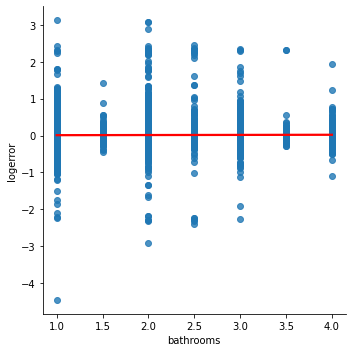

In [20]:
sns.lmplot(x='bathrooms', y='logerror', data=train, line_kws={'color':'red'})
plt.show()

### Statistical Test and Null Hypothesis:
$H_0$: There is no linear correlation between logerror and number of bedrooms


$H_a$: There is a linear correlation between logerror and number of bedrooms

#### I will be performing a pearsons r test to compute statisitcs for relationship.

In [21]:
corr, p = stats.pearsonr(train.bathrooms, train.logerror)
corr, p

(0.01671717089665666, 0.0012241418425439424)

In [22]:
if p < alpha: 
    print('I reject the null hypothesis.')
else:
    print('I fail to reject the null hypothesis.')

I reject the null hypothesis.


#### Takeaways:
- There is some linear correlation between number of bedrooms and logerror.

### Question 2: Is log error significantly different per number of bedrooms?

$H_0$: There is no significant difference between number of bedrooms and logerror.

$H_a$: There is a significant difference between number of bedrooms and logerror.

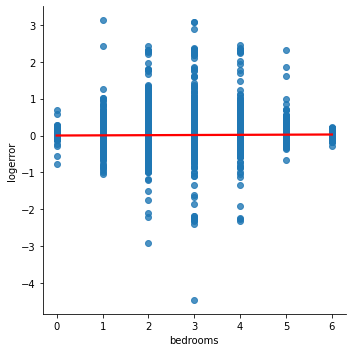

In [23]:
sns.lmplot(x='bedrooms', y='logerror', data=train, line_kws={'color':'red'})
plt.show()

In [24]:
corr, p = stats.pearsonr(train.logerror, train.bedrooms)
corr, p

(0.026580957068251657, 2.7261870784324833e-07)

In [25]:
if p < alpha: 
    print('I reject the null hypothesis that there is no significant difference between number of bedrooms and logerror.')
else:
    print('I fail to reject the null hypothesis.')

I reject the null hypothesis that there is no significant difference between number of bedrooms and logerror.


#### Takeaways:
- There is some linear correlation between number of bathrooms and logerror.

### Question 3: Is there a significant difference between population logerror and logerror in LA vs Orange vs Ventura? 

In [26]:
la = train[train.county == 'Los Angeles']
orange = train[train.county == 'Orange']
ventura = train[train.county == 'Ventura']

In [27]:
print(la.logerror.var())
print(train.logerror.var())

0.02192992083182215
0.024677300338793368


There is no equal variance between LA LE and Pop LE so I will be conducting a mannwhiteney test with the alternative set to 'two-sided'

In [28]:
la.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23991 entries, 35021 to 30112
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   parcelid       23991 non-null  int64  
 1   logerror       23991 non-null  float64
 2   bathrooms      23991 non-null  float64
 3   bedrooms       23991 non-null  int64  
 4   square_feet    23991 non-null  int64  
 5   county         23991 non-null  object 
 6   year_built     23991 non-null  int64  
 7   property_type  23991 non-null  object 
 8   property_age   23991 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.8+ MB


### Los Angeles Logerror and Population Logerror:

$H_0$: There is no significant difference between Los Angeles Logerror and population logerror. 

$H_a$: There is a significant difference between Los Angeles logerror and population logerror.

In [29]:
alpha = .05
t, p = stats.mannwhitneyu(la.logerror, train.logerror, alternative='two-sided')

if p < alpha:
    print('I reject the null hypothesis that there is no difference.')
else:
    print('I fail to reject the null hypothesis. There is a significant difference.')

I fail to reject the null hypothesis. There is a significant difference.


#### Takeaway:
- There is a significant difference between Los Angeles Logerror and the population logerror.

### Ventura County Logerror and Population Logerror:

$H_0$: There is no significant difference between Los Angeles Logerror and population logerror. 

$H_a$: There is a significant difference between Los Angeles logerror and population logerror.

In [30]:
print(ventura.logerror.var())
print(train.logerror.var())

0.025085433646226542
0.024677300338793368


There is a slight difference, nonetheless a difference between the variances. As such, a mannwhiteney test with the alternative = 'two-sided'

In [31]:
alpha = .05
t, p = stats.mannwhitneyu(ventura.logerror, train.logerror, alternative='two-sided')

if p < alpha:
    print('I reject the null hypothesis that there is no difference.')
else:
    print('I fail to reject the null hypothesis. There is a significant difference.')

I fail to reject the null hypothesis. There is a significant difference.


#### Takeaway:
- There is a significant difference between Los Angeles Logerror and population logerror.

### Orange County and Population Logerror:

$H_0$: There is no significant difference between Orange County Logerror and population logerror. 

$H_a$: There is a significant difference between Orange County logerror and population logerror

In [32]:
print(orange.logerror.var())
print(train.logerror.var())

0.03086705233577592
0.024677300338793368


There is a difference in variance, thus not equal. 

In [33]:
alpha = .05
t, p = stats.mannwhitneyu(orange.logerror, train.logerror, alternative='two-sided')

if p < alpha:
    print('I reject the null hypothesis that there is no difference.')
else:
    print('I fail to reject the null hypothesis. There is a significant difference.')

I reject the null hypothesis that there is no difference.


### Takeaways:
- There is no significant difference, or no difference between Orange County Logerror and the population logerror.

## Question 4: Is log error significantly different per Property Age?  (Is there a linear correlation?)

$H_0$: There is no linear correlation between Property Age and Logerror

$H_a$: There is a linear correlation between property age and logerror

Text(0.5, 1.0, 'Correlation between Property Age and Logerror')

<Figure size 1152x576 with 0 Axes>

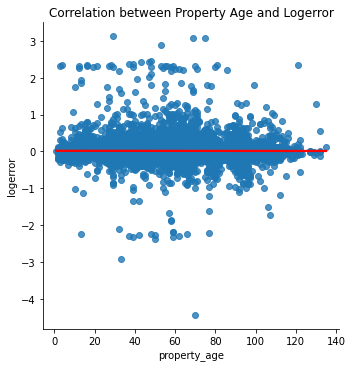

In [34]:
plt.figure(figsize=(16,8))
sns.lmplot(data=train, x='property_age', y='logerror', line_kws={'color':'red'})
plt.show
plt.title('Correlation between Property Age and Logerror')

In [35]:
corr, p = stats.pearsonr(train.property_age, train.logerror)
corr, p

(-0.00545687042775193, 0.29127743051465743)

In [36]:
if p < alpha:
    print('I reject the null hypothesis that there is no linear correlation.')
else:
    print('I fail to reject the null hypothesis, there is a linear correlation.')

I fail to reject the null hypothesis, there is a linear correlation.


### Takeaways:
- There is a linear correlation between the age of the property and logerror.

## Question 5: While controlling for property type, is there a linear correlation between the year the home was built and logerror?

$H_0$: There is no significant difference between the type of property and logerror

$H_a$: There is a significant difference between logerror and type of property.

In [37]:
train.property_type.value_counts()

Single Family Residential    26722
Condominium                  10643
Mobile Home                     34
Townhouse                        4
Name: property_type, dtype: int64

Mobile homes and townhomes won't be observed as the sample size is too small.

In [38]:
single_family = train[train.property_type == 'Single Family Residential']
condo = train[train.property_type == 'Condominium']

In [39]:
types = ['Single Family Residential', 'Condominium']

In [40]:
condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10643 entries, 71705 to 53764
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   parcelid       10643 non-null  int64  
 1   logerror       10643 non-null  float64
 2   bathrooms      10643 non-null  float64
 3   bedrooms       10643 non-null  int64  
 4   square_feet    10643 non-null  int64  
 5   county         10643 non-null  object 
 6   year_built     10643 non-null  int64  
 7   property_type  10643 non-null  object 
 8   property_age   10643 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 831.5+ KB


### Condominium homes:

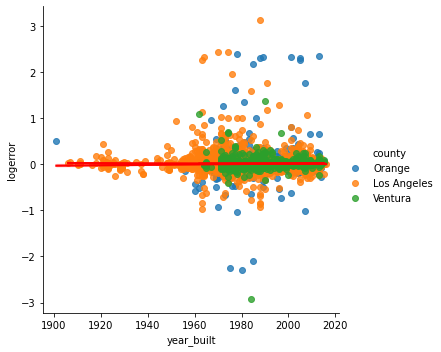

In [41]:
sns.lmplot(data=condo, x='year_built', y='logerror', line_kws={'color':'red'}, 
           hue='county')

In [42]:
corr, p = stats.pearsonr(condo.year_built, condo.logerror)
corr, p

(0.00040702463945649977, 0.9665100717471539)

In [43]:
if p < alpha:
    print('I reject the null hypothesis that there is no linear correlation.')
else:
    print('I fail to reject the null hypothesis, there is a linear correlation.')

I fail to reject the null hypothesis, there is a linear correlation.


Takeaways:
   - Strong postive linear correlation. P value .96

### Single Family Residentials

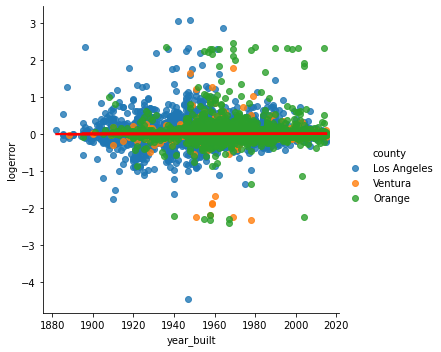

In [44]:
sns.lmplot(data=single_family, x='year_built', y='logerror', line_kws={'color':'red'}, 
           hue='county')

In [45]:
corr, p = stats.pearsonr(single_family.year_built, single_family.logerror)
corr, p

(0.013039103979324763, 0.03304997746892311)

In [46]:
if p < alpha:
    print('I reject the null hypothesis that there is no linear correlation.')
else:
    print('I fail to reject the null hypothesis, there is a linear correlation.')

I reject the null hypothesis that there is no linear correlation.


### Takeaways:
- No linear correlation between type single family residential's year built, and logerror.

### Exploration Summary and Key Takeaways:
- When observing general home features such as bedrooms and bathrooms: 
    - There is some linear correlation between number of bedrooms and logerror.
    - There is some linear correlation between number of bathrooms and logerror.

- When controlling for county:
    - There is a significant difference between Los Angeles Logerror and the population logerror.
    - There is a significant difference between Los Angeles Logerror and population logerror.
    - There is no significant difference, or no difference between Orange County Logerror and the population logerror.
- When controlling for property type:
    - Townhomes and Mobile home data sample were too small to perform any meaningful statistical operations.
    - No linear correlation between type single family residential's year built, and logerror.
    - Strong postive linear correlation between the year condiminums were built and logerror. (P value .96)

# Clustering

## Scaling the data

In [47]:
train_scaled, validate_scaled, test_scaled = wr.scale_data(train, validate, test)

df = train_scaled.copy()
df.head()

,parcelid,logerror,bathrooms,bedrooms,square_feet,county,year_built,property_type,property_age
35021,12456239,0.110467,0.000000,0.166667,0.105704,Los Angeles,0.447761,Single Family Residential,0.552239
5579,12864000,0.000151,1.000000,0.833333,0.862391,Los Angeles,0.597015,Single Family Residential,0.402985
71705,14733743,0.054847,0.500000,0.333333,0.321624,Orange,0.865672,Condominium,0.134328
57277,17075614,0.092856,0.666667,0.500000,0.610377,Ventura,0.805970,Single Family Residential,0.194030
45925,11177880,-0.041157,0.333333,0.333333,0.282307,Los Angeles,0.768657,Single Family Residential,0.231343


### Cluster 1 : Property size

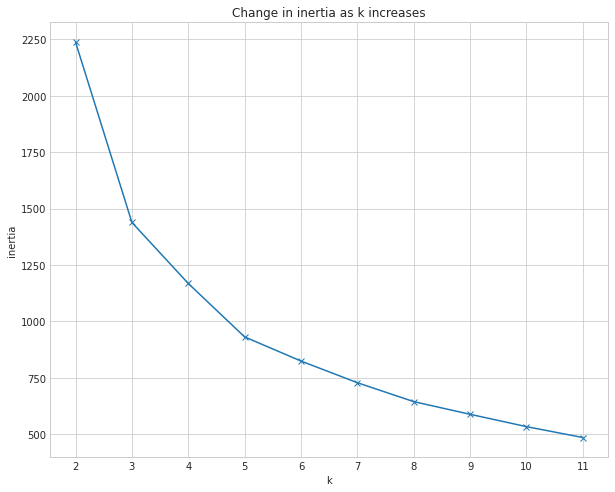

In [55]:
X = df[['square_feet', 'bedrooms', 'bathrooms']]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### Inertia loses momentum around 4 so I will move forward with 4 clusters.

In [58]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 4)

#Fit the model
kmeans.fit(X)

#Make predictions and assign the values to the original train data set
train['property_size_cluster'] = kmeans.predict(X)

### Cluster 2: Age of property

In [54]:
X2 = df[['property_age', 'year_built']]

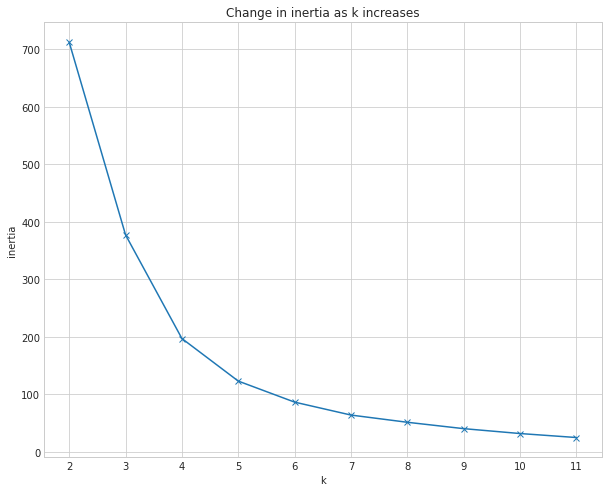

In [56]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### Inertia again loses momentum around 4 so I will move forward with 4 clusters.

In [59]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 4)

#Fit the model
kmeans.fit(X2)

#Make predictions and assign the values to the original train data set
train['age_cluster'] = kmeans.predict(X2)

#### I will now move on to modeling to obtain and mvp